# Feature Engineering on Delhivery Data
Delhivery is the largest and fastest-growing fully integrated player in India by revenue in Fiscal 2021. They aim to build the operating system for commerce, through a combination of world-class infrastructure, logistics operations of the highest quality, and cutting-edge engineering and technology capabilities.

The Data team builds intelligence and capabilities using this data that helps them to widen the gap between the quality, efficiency, and profitability of their business versus their competitors.

The company wants to understand and process the data coming out of data engineering pipelines:

* Clean, sanitize and manipulate data to get useful features out of raw fields.
* Make sense out of the raw data and help the data science team to build forecasting models on it.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import math
import random

from scipy.stats import chi2_contingency, f_oneway, ttest_ind, shapiro, levene, kruskal

from statsmodels.stats.weightstats import ztest

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/Delivery.csv')
df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,9/20/2018 2:35,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),9/20/2018 3:21,...,9/20/2018 4:27,10.435660,14,11,11.9653,1.272727,14,11,11.9653,1.272727
1,training,9/20/2018 2:35,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),9/20/2018 3:21,...,9/20/2018 4:17,18.936842,24,20,21.7243,1.200000,10,9,9.7590,1.111111
2,training,9/20/2018 2:35,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),9/20/2018 3:21,...,9/20/2018 4:01,27.637279,40,28,32.5395,1.428571,16,7,10.8152,2.285714
3,training,9/20/2018 2:35,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),9/20/2018 3:21,...,9/20/2018 3:39,36.118028,62,40,45.5620,1.550000,21,12,13.0224,1.750000
4,training,9/20/2018 2:35,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),9/20/2018 3:21,...,9/20/2018 3:33,39.386040,68,44,54.2181,1.545455,6,5,3.9153,1.200000


In [ ]:
df.shape

(144867, 24)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  int64  
 12  is_cutoff       

In [ ]:
df.columns

Index(['data', 'trip_creation_time', 'route_schedule_uuid', 'route_type',
       'trip_uuid', 'source_center', 'source_name', 'destination_center',
       'destination_name', 'od_start_time', 'od_end_time',
       'start_scan_to_end_scan', 'is_cutoff', 'cutoff_factor',
       'cutoff_timestamp', 'actual_distance_to_destination', 'actual_time',
       'osrm_time', 'osrm_distance', 'factor', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance', 'segment_factor'],
      dtype='object')

Dropping these columns as there is no significance in our data

In [ ]:
df.drop(['route_schedule_uuid', 'is_cutoff', 'cutoff_factor', 'cutoff_timestamp', 'factor', 'segment_factor'], axis = 1, inplace=True)

# Exploratory Data Analysis

In [ ]:
# Numeric Values
df.describe()

,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
count,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.00000
mean,961.262986,234.073372,416.927527,213.868272,284.771297,36.196111,18.507548,22.82902
std,1037.012769,344.990009,598.103621,308.011085,421.119294,53.571158,14.775960,17.86066
min,20.000000,9.000045,9.000000,6.000000,9.008200,-244.000000,0.000000,0.00000
25%,161.000000,23.355874,51.000000,27.000000,29.914700,20.000000,11.000000,12.07010
50%,449.000000,66.126571,132.000000,64.000000,78.525800,29.000000,17.000000,23.51300
75%,1634.000000,286.708875,513.000000,257.000000,343.193250,40.000000,22.000000,27.81325
max,7898.000000,1927.447705,4532.000000,1686.000000,2326.199100,3051.000000,1611.000000,2191.40370


In [ ]:
# catgeorical features
df.describe(include = ['object'])

,data,trip_creation_time,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time
count,144867,144867,144867,144867,144867,144574,144867,144606,144867,144867
unique,2,11341,2,14817,1508,1498,1481,1468,16500,16588
top,training,9/13/2018 19:44,FTL,trip-153811219535896559,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),9/23/2018 22:16,10/5/2018 7:38
freq,104858,162,99660,101,23347,23347,15192,15192,134,144


Data Column

In [ ]:
df["data"].value_counts()


,count
data,
training,104858
test,40009


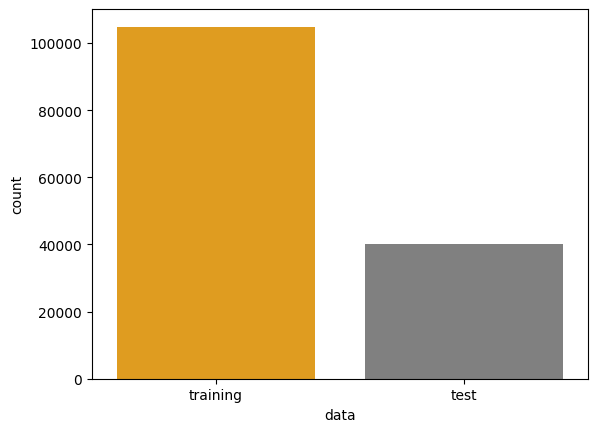

In [ ]:
custom_palette = ['orange', 'grey']
sns.countplot(data=df, x='data',palette=custom_palette)
plt.show()

Route Type Column

In [ ]:
df["route_type"].value_counts()


,count
route_type,
FTL,99660
Carting,45207


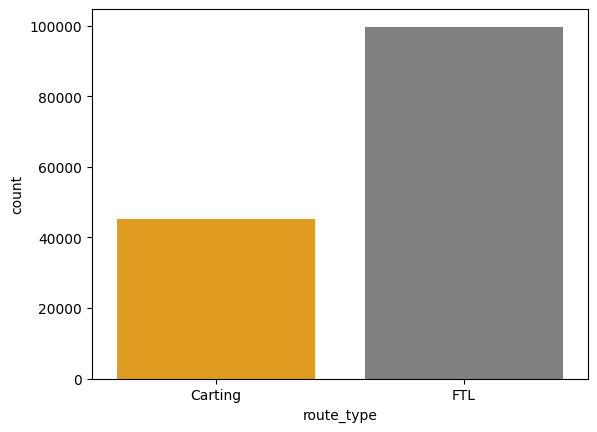

In [ ]:
sns.countplot(data=df, x='route_type',palette=custom_palette)
plt.show()

In [ ]:
#changing the datatype of datetime columns
df["trip_creation_time"] = pd.to_datetime(df["trip_creation_time"], infer_datetime_format=True)
df["od_start_time"] = pd.to_datetime(df["od_start_time"], infer_datetime_format=True)
df["od_end_time"] = pd.to_datetime(df["od_end_time"], infer_datetime_format=True)

Handling Missing Values

In [ ]:
df.isna().sum()

,0
data,0
trip_creation_time,0
route_type,0
trip_uuid,0
source_center,0
source_name,293
destination_center,0
destination_name,261
od_start_time,0
od_end_time,0


In [ ]:
#checking if missing place details are present in other columns

print(df[(df["source_name"].isna()) & ~(df["source_center"].isna())][["source_name", "source_center"]].drop_duplicates())

print(df[(df["destination_name"].isna()) & ~(df["destination_center"].isna())]
      [["destination_name", "destination_center"]].drop_duplicates())

       source_name source_center
112            NaN  IND342902A1B
984            NaN  IND577116AAA
3842           NaN  IND282002AAD
7248           NaN  IND465333A1B
12359          NaN  IND841301AAC
24310          NaN  IND509103AAC
27817          NaN  IND126116AAA
68006          NaN  IND331022A1B
70272          NaN  IND505326AAB
133105         NaN  IND852118A1B
      destination_name destination_center
110                NaN       IND342902A1B
982                NaN       IND577116AAA
4882               NaN       IND282002AAD
7246               NaN       IND465333A1B
12366              NaN       IND841301AAC
13767              NaN       IND505326AAB
20929              NaN       IND852118A1B
27815              NaN       IND126116AAA
28497              NaN       IND509103AAC
28834              NaN       IND221005A1A
46830              NaN       IND250002AAC
68006              NaN       IND331001A1C
99094              NaN       IND122015AAC


We have missing values in source_name and destination_name columns. But the IDs for these columns is not null in source_center and destination_center columns. So we can ignore these missing values and replace their value as "Other".

In [ ]:
#replacing missing values with 'Other'

df['source_name'] = df['source_name'].fillna('Other')
df['destination_name'] = df['destination_name'].fillna('Other')

In [ ]:
df.isna().sum()

,0
data,0
trip_creation_time,0
route_type,0
trip_uuid,0
source_center,0
source_name,0
destination_center,0
destination_name,0
od_start_time,0
od_end_time,0


BI-VARIATE ANALYSIS

<Axes: xlabel='start_scan_to_end_scan', ylabel='Count'>

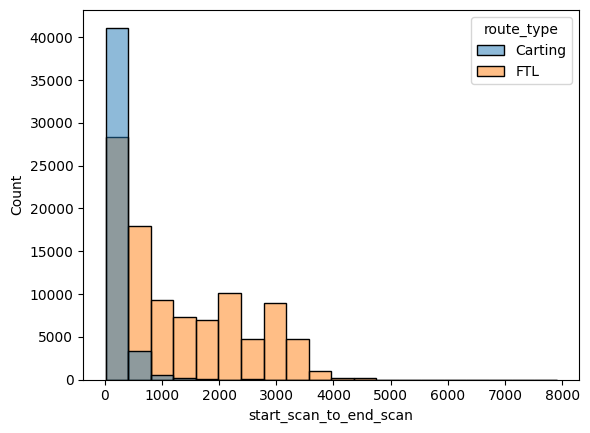

In [ ]:
# Create a histogram plot with hue as route_type
sns.histplot(data=df, x='start_scan_to_end_scan', hue='route_type', bins=20)

Merging columns and aggregating numerical values



In [ ]:
#converting data types
df["trip_uuid"] = df["trip_uuid"].astype("string")
df["source_center"] = df["source_center"].astype("string")
df["destination_center"] = df["destination_center"].astype("string")

#create a new concatenated column
df['segment_id'] = df.apply(lambda x: x['trip_uuid'] + '_' + x['source_center']+ '_' + x['destination_center'], axis=1)
df.head()

,data,trip_creation_time,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_id
0,training,2018-09-20 02:35:00,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:00,2018-09-20 04:47:00,86,10.435660,14,11,11.9653,14,11,11.9653,trip-153741093647649320_IND388121AAA_IND388620AAB
1,training,2018-09-20 02:35:00,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:00,2018-09-20 04:47:00,86,18.936842,24,20,21.7243,10,9,9.7590,trip-153741093647649320_IND388121AAA_IND388620AAB
2,training,2018-09-20 02:35:00,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:00,2018-09-20 04:47:00,86,27.637279,40,28,32.5395,16,7,10.8152,trip-153741093647649320_IND388121AAA_IND388620AAB
3,training,2018-09-20 02:35:00,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:00,2018-09-20 04:47:00,86,36.118028,62,40,45.5620,21,12,13.0224,trip-153741093647649320_IND388121AAA_IND388620AAB
4,training,2018-09-20 02:35:00,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:00,2018-09-20 04:47:00,86,39.386040,68,44,54.2181,6,5,3.9153,trip-153741093647649320_IND388121AAA_IND388620AAB


In [ ]:
df.dtypes

,0
data,object
trip_creation_time,datetime64[ns]
route_type,object
trip_uuid,string[python]
source_center,string[python]
source_name,object
destination_center,string[python]
destination_name,object
od_start_time,datetime64[ns]
od_end_time,datetime64[ns]


In [ ]:
df['cum_actual_distance_to_destination'] = df.groupby(['segment_id'])['actual_distance_to_destination'].cumsum()
df['cum_segment_actual_time'] = df.groupby(['segment_id'])['segment_actual_time'].cumsum()
df['cum_segment_osrm_time'] = df.groupby(['segment_id'])['segment_osrm_time'].cumsum()
df['cum_segment_osrm_distance'] = df.groupby(['segment_id'])['segment_osrm_distance'].cumsum()

df.drop(['segment_osrm_distance', 'actual_distance_to_destination', 'segment_actual_time', 'segment_osrm_time'], axis=1, inplace=True)
df = df.groupby(['segment_id']).tail(1)
df.head()

,data,trip_creation_time,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_time,osrm_time,osrm_distance,segment_id,cum_actual_distance_to_destination,cum_segment_actual_time,cum_segment_osrm_time,cum_segment_osrm_distance
4,training,2018-09-20 02:35:00,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:00,2018-09-20 04:47:00,86,68,44,54.2181,trip-153741093647649320_IND388121AAA_IND388620AAB,132.513850,67,44,49.4772
9,training,2018-09-20 02:35:00,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:00,2018-09-20 06:36:00,109,102,45,53.2334,trip-153741093647649320_IND388620AAB_IND388320AAA,139.045383,100,44,53.2334
14,training,2018-09-23 06:42:00,FTL,trip-153768492602129387,IND421302AAG,Bhiwandi_Mankoli_HB (Maharashtra),IND411033AAA,Pune_Tathawde_H (Maharashtra),2018-09-23 06:42:00,2018-09-23 11:44:00,302,183,95,129.3519,trip-153768492602129387_IND421302AAG_IND411033AAA,328.874342,180,106,130.4089
16,training,2018-09-14 15:42:00,Carting,trip-153693976643699843,IND400011AAA,LowerParel_CP (Maharashtra),IND400072AAD,Mumbai_Chndivli_PC (Maharashtra),2018-09-14 15:42:00,2018-09-14 17:31:00,108,60,16,18.7941,trip-153693976643699843_IND400011AAA_IND400072AAD,25.787125,60,16,18.7941
18,training,2018-09-13 20:44:00,FTL,trip-153687145942424248,IND562132AAA,Bangalore_Nelmngla_H (Karnataka),IND560099AAB,Bengaluru_Bomsndra_HB (Karnataka),2018-09-13 20:44:00,2018-09-13 23:59:00,195,67,53,52.1256,trip-153687145942424248_IND562132AAA_IND560099AAB,63.441846,67,56,53.9310


# FEATURE ENGINEERING

Feature Creation

In [ ]:
#Source features
df[['source_1', 'source_2', 'source_3','temp']] = df["source_name"].str.split("_", expand = True)
df[['source_3', 'source_state']] = df["source_3"].str.split("(", expand = True)
df[['source_state', 'temp']] = df["source_state"].str.split(")", expand = True)

#Destination features
df[['destination_1', 'destination_2', 'destination_3','temp']] = df["destination_name"].str.split("_", expand = True)
df[['destination_3', 'destination_state']] = df["destination_3"].str.split("(", expand = True)
df[['destination_state', 'temp']] = df["destination_state"].str.split(")", expand = True)
df.drop("temp", axis =1, inplace=True)

#source and destination of trip
df['trip_source'] = df.groupby('trip_uuid')['source_center'].head(1)
df['trip_destination'] = df.groupby('trip_uuid')['destination_center'].tail(1)
df['trip_source'] = df.groupby('trip_uuid', group_keys=False)['trip_source'].apply(lambda x: x.ffill())
df['trip_destination'] = df.groupby('trip_uuid', group_keys=False)['trip_destination'].apply(lambda x: x.bfill())

#Day, month and year features from trip_creation_time
df['trip_year'] = df['trip_creation_time'].dt.year
df['trip_month'] = df['trip_creation_time'].dt.month_name()
df['trip_day'] = df['trip_creation_time'].dt.day

df.reset_index(inplace = True)
df.drop(["index"], axis=1, inplace=True)
df.head()


,data,trip_creation_time,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,...,source_state,destination_1,destination_2,destination_3,destination_state,trip_source,trip_destination,trip_year,trip_month,trip_day
0,training,2018-09-20 02:35:00,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:00,2018-09-20 04:47:00,...,Gujarat,Khambhat,MotvdDPP,D,Gujarat,IND388121AAA,IND388320AAA,2018,September,20
1,training,2018-09-20 02:35:00,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:00,2018-09-20 06:36:00,...,Gujarat,Anand,Vaghasi,IP,Gujarat,IND388121AAA,IND388320AAA,2018,September,20
2,training,2018-09-23 06:42:00,FTL,trip-153768492602129387,IND421302AAG,Bhiwandi_Mankoli_HB (Maharashtra),IND411033AAA,Pune_Tathawde_H (Maharashtra),2018-09-23 06:42:00,2018-09-23 11:44:00,...,Maharashtra,Pune,Tathawde,H,Maharashtra,IND421302AAG,IND411033AAA,2018,September,23
3,training,2018-09-14 15:42:00,Carting,trip-153693976643699843,IND400011AAA,LowerParel_CP (Maharashtra),IND400072AAD,Mumbai_Chndivli_PC (Maharashtra),2018-09-14 15:42:00,2018-09-14 17:31:00,...,None,Mumbai,Chndivli,PC,Maharashtra,IND400011AAA,IND400072AAD,2018,September,14
4,training,2018-09-13 20:44:00,FTL,trip-153687145942424248,IND562132AAA,Bangalore_Nelmngla_H (Karnataka),IND560099AAB,Bengaluru_Bomsndra_HB (Karnataka),2018-09-13 20:44:00,2018-09-13 23:59:00,...,Karnataka,Bengaluru,Bomsndra,HB,Karnataka,IND562132AAA,IND683511AAA,2018,September,13


In [ ]:
df.shape

(26368, 32)

In [ ]:
df.dtypes

,0
data,object
trip_creation_time,datetime64[ns]
route_type,object
trip_uuid,string[python]
source_center,string[python]
source_name,object
destination_center,string[python]
destination_name,object
od_start_time,datetime64[ns]
od_end_time,datetime64[ns]


In [ ]:
#checking acurracy of start_scan_to_end_scan column
len(df[df["start_scan_to_end_scan"] != ((df['od_end_time'] - df['od_start_time']).dt.total_seconds().div(60).astype(int))])
df.drop(['od_end_time', 'od_start_time'], axis=1, inplace=True)

Time between od_end_time and od_start_time is matching with start_scan_to_end_scan.

In [ ]:
#converting month and year columns to category
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df["trip_month"] = pd.Categorical(df["trip_month"], categories=month_order, ordered=True)
df["trip_year"] = pd.Categorical(df["trip_year"])

# catgeorical and numerical columns
cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
num_cols = num_cols[:-1]

print("Categorical Columns: "+str(cat_cols))
print("Numerical Columns: "+ str(num_cols))

Categorical Columns: ['data', 'route_type', 'source_name', 'destination_name', 'segment_id', 'source_1', 'source_2', 'source_3', 'source_state', 'destination_1', 'destination_2', 'destination_3', 'destination_state', 'trip_year', 'trip_month']
Numerical Columns: ['start_scan_to_end_scan', 'actual_time', 'osrm_time', 'osrm_distance', 'cum_actual_distance_to_destination', 'cum_segment_actual_time', 'cum_segment_osrm_time']


In [ ]:
# numerical features
df.describe()

,trip_creation_time,start_scan_to_end_scan,actual_time,osrm_time,osrm_distance,cum_actual_distance_to_destination,cum_segment_actual_time,cum_segment_osrm_time,cum_segment_osrm_distance,trip_day
count,26368,26368.000000,26368.000000,26368.000000,26368.000000,26368.000000,26368.000000,26368.000000,26368.000000,26368.000000
mean,2018-09-22 14:43:06.676274432,298.262060,200.690193,90.686704,114.827642,1286.009827,198.863092,101.681318,125.423680,18.405074
min,2018-09-12 00:00:00,20.000000,9.000000,6.000000,9.072900,9.001351,9.000000,6.000000,9.072900,1.000000
25%,2018-09-17 04:43:00,91.000000,51.000000,25.000000,27.764725,47.447490,50.000000,25.000000,28.471300,14.000000
50%,2018-09-22 04:42:00,152.000000,84.000000,39.000000,43.633050,83.445372,83.000000,42.000000,45.944400,19.000000
75%,2018-09-27 20:22:15,307.000000,168.000000,72.000000,85.566975,205.002010,166.000000,79.000000,91.351975,25.000000
max,2018-10-03 23:59:00,7898.000000,4532.000000,1686.000000,2326.199100,85110.885092,4504.000000,1938.000000,2640.924700,30.000000
std,NaN,440.556923,384.853640,185.080423,253.773765,6512.604309,381.283224,215.650948,285.932556,7.914011


In [ ]:
# catgeorical features
df.describe(include = ['object', "category", 'string'])

,data,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,segment_id,source_1,source_2,source_3,source_state,destination_1,destination_2,destination_3,destination_state,trip_source,trip_destination,trip_year,trip_month
count,26368,26368,26368,26368,26368,26368,26368,26368,26368,25476,23322,20814,26368,25299,23244,20882,26368,26368,26368,26368
unique,2,2,14817,1508,1499,1481,1469,26368,1263,1178,24,30,1259,1154,27,30,868,956,1,2
top,training,FTL,trip-153717306559016761,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),trip-153741093647649320_IND388121AAA_IND388620AAB,Gurgaon,Central,D,Karnataka,Bengaluru,Central,D,Karnataka,IND000000ACB,IND000000ACB,2018,September
freq,18947,13939,8,1063,1063,928,928,1,1141,1988,9171,3108,1180,1861,9165,3077,1059,1069,26368,23159


In [ ]:
df["source_state"].value_counts()


,count
source_state,
Karnataka,3108
Maharashtra,2787
Tamil Nadu,1864
Haryana,1836
Uttar Pradesh,1376
Telangana,1359
Andhra Pradesh,1220
West Bengal,966
Bihar,827


In [ ]:
df["destination_state"].value_counts()


,count
destination_state,
Karnataka,3077
Maharashtra,2748
Tamil Nadu,1967
Haryana,1758
Telangana,1484
Uttar Pradesh,1396
Andhra Pradesh,1211
West Bengal,993
Bihar,836


In [ ]:
df["source_1"].value_counts()


,count
source_1,
Gurgaon,1141
Bengaluru,1136
Bhiwandi,821
Bangalore,792
Mumbai,719
...,...
Tirtol,1
Manvi,1
Kendrpara,1


In [ ]:
df["destination_1"].value_counts()


,count
destination_1,
Bengaluru,1180
Mumbai,1000
Gurgaon,986
Bangalore,683
Hyderabad,643
...,...
Gahmar,1
Shrimadhopur,1
Thachnttukra,1


**What is the most used segment?**



In [ ]:
df[['source_center', 'destination_center']].value_counts().head(1)

,,count
source_center,destination_center,
IND562132AAA,IND560300AAA,151


In [ ]:
print(df[df['source_center'] == 'IND562132AAA']["source_name"].unique())
print(df[df['destination_center'] == 'IND560300AAA']["destination_name"].unique())

['Bangalore_Nelmngla_H (Karnataka)']
['Bengaluru_KGAirprt_HB (Karnataka)']


Segment between Bangalore_Nelmngla_H, Karnataka and Bengaluru_KGAirprt_HB,Karnataka is the most used segment.

**Which center has most traffic?**

In [ ]:
df[['source_center']].value_counts().head(1)


,count
source_center,
IND000000ACB,1063


In [ ]:
df[['destination_center']].value_counts().head(1)


,count
destination_center,
IND000000ACB,928


In [ ]:
df[df['source_center'] == 'IND000000ACB']["source_name"].unique()

array(['Gurgaon_Bilaspur_HB (Haryana)'], dtype=object)

Gurgaon_Bilaspur_HB, Haryana is the centre with highest traffic.



**Which trip is the most often used?**

In [ ]:
df[['trip_uuid', 'trip_source', 'trip_destination']].drop_duplicates().value_counts()


,,,count
trip_uuid,trip_source,trip_destination,
trip-153671041653548748,IND462022AAA,IND000000ACB,1
trip-153791331656620454,IND361001AAA,IND361335AAA,1
trip-153791340002649773,IND363520AAC,IND364710AAA,1
trip-153791341220571147,IND842001AAA,IND842001AAA,1
trip-153791345208672550,IND363641AAA,IND363621AAB,1
...,...,...,...
trip-153730385530436915,IND560099AAB,IND560048AAB,1
trip-153730387256906443,IND501359AAE,IND500080AAB,1
trip-153730391233462064,IND560099AAB,IND560043AAC,1


There is one record for every trip.

**What is the longest trip?**

In [ ]:
df[df['route_type']=='Carting'][['trip_uuid', 'trip_source', 'trip_destination', 'start_scan_to_end_scan']].groupby(['trip_uuid', 'trip_source', 'trip_destination']).sum().sort_values(by='start_scan_to_end_scan', ascending=False).head(1)

,,,start_scan_to_end_scan
trip_uuid,trip_source,trip_destination,
trip-153843695443252828,IND764071AAB,IND530012AAA,7898


In [ ]:
df[df['trip_uuid'] == 'trip-153843695443252828']


,data,trip_creation_time,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,start_scan_to_end_scan,actual_time,...,source_state,destination_1,destination_2,destination_3,destination_state,trip_source,trip_destination,trip_year,trip_month,trip_day
22440,test,2018-10-01 23:35:00,Carting,trip-153843695443252828,IND764071AAB,Pappadahandi_Central_DPP_2 (Orissa),IND530012AAA,Visakhapatnam_Gajuwaka_IP (Andhra Pradesh),7898,2541,...,None,Visakhapatnam,Gajuwaka,IP,Andhra Pradesh,IND764071AAB,IND530012AAA,2018,October,1


In [ ]:
df[df['route_type']=='FTL'][['trip_uuid', 'trip_source', 'trip_destination', 'start_scan_to_end_scan']].groupby(['trip_uuid', 'trip_source', 'trip_destination']).sum().sort_values(by='start_scan_to_end_scan', ascending=False).head(1)

,,,start_scan_to_end_scan
trip_uuid,trip_source,trip_destination,
trip-153840656812932039,IND781018AAB,IND421302AAG,7458


In [ ]:
df[df['trip_uuid'] == 'trip-153840656812932039']

,data,trip_creation_time,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,start_scan_to_end_scan,actual_time,...,source_state,destination_1,destination_2,destination_3,destination_state,trip_source,trip_destination,trip_year,trip_month,trip_day
8889,test,2018-10-01 15:09:00,FTL,trip-153840656812932039,IND781018AAB,Guwahati_Hub (Assam),IND712311AAA,Kolkata_Dankuni_HB (West Bengal),3251,2901,...,None,Kolkata,Dankuni,HB,West Bengal,IND781018AAB,IND421302AAG,2018,October,1
8890,test,2018-10-01 15:09:00,FTL,trip-153840656812932039,IND712311AAA,Kolkata_Dankuni_HB (West Bengal),IND421302AAG,Bhiwandi_Mankoli_HB (Maharashtra),4207,3364,...,West Bengal,Bhiwandi,Mankoli,HB,Maharashtra,IND781018AAB,IND421302AAG,2018,October,1


In Carting, Pappadahandi_Central_DPP_2, Orissa to Visakhapatnam_Gajuwaka_IP, Andhra Pradesh is the longest trip. In FTL, trip from Guwahati_Hub, Assam to Bhiwandi_Mankoli_HB, Maharashtra is the longest trip.

# Hypothesis Testing

**actual_time and osrm_time**



In [ ]:
df[['actual_time', 'osrm_time']].describe()


,actual_time,osrm_time
count,26368.000000,26368.000000
mean,200.690193,90.686704
std,384.853640,185.080423
min,9.000000,6.000000
25%,51.000000,25.000000
50%,84.000000,39.000000
75%,168.000000,72.000000
max,4532.000000,1686.000000


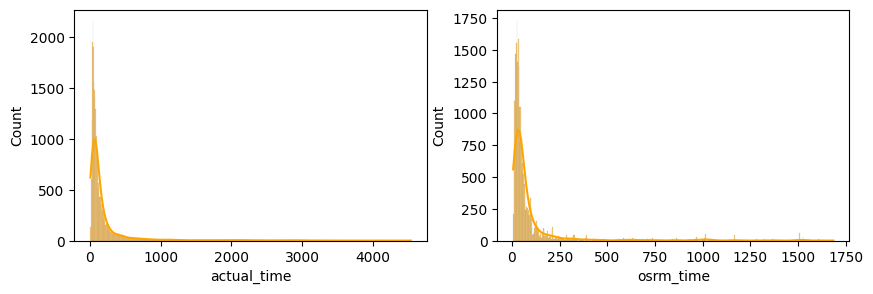

In [ ]:
plt.figure(figsize=(10,3))

plt.subplot(121)
sns.histplot(df['actual_time'], kde=True, color='orange')

plt.subplot(122)
sns.histplot(df['osrm_time'], kde=True, color='orange')

plt.show()

In [ ]:
# Perform the two-sample t-test

#H0: No difference between actual_time and osrm_time

ttest_ind(df['actual_time'], df['osrm_time'])

TtestResult(statistic=41.82845508363711, pvalue=0.0, df=52734.0)

The p-value is less than the significance level of 0.05, which means we reject the null hypothesis. We can conclude that there is significant difference in the mean actual_time and osrm_time.

In [ ]:
#H0: mean(actual_time) > mean(osrm_time)
ttest_ind(df['actual_time'], df['osrm_time'], alternative="greater")

TtestResult(statistic=41.82845508363711, pvalue=0.0, df=52734.0)

* The p-value is less than the significance level of 0.05, which means we reject the null hypothesis.
* Mean(actual_time) < Mean(osrm_time)
* Estimated time between two points is greater then actual time.

**actual_time and segment_actual_time**



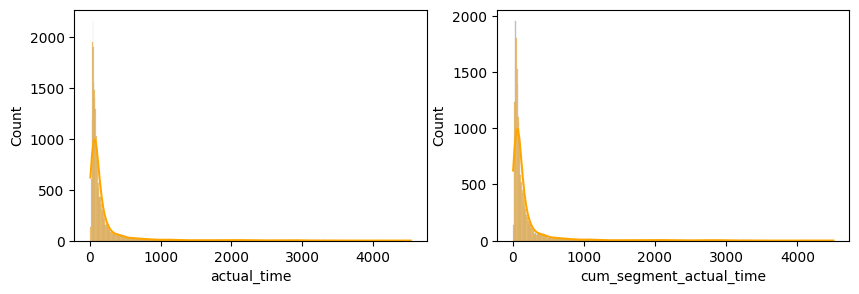

In [ ]:
plt.figure(figsize=(10,3))

plt.subplot(121)
sns.histplot(df['actual_time'], kde=True, color='orange')

plt.subplot(122)
sns.histplot(df['cum_segment_actual_time'], kde=True, color='orange')

plt.show()

In [ ]:
# Perform the two-sample t-test

#H0: No difference between actual_time and segment_actual_time

ttest_ind(df['actual_time'], df['cum_segment_actual_time'])

TtestResult(statistic=0.5476525068970126, pvalue=0.5839328464797933, df=52734.0)

The p-value is greater than the significance level of 0.05, which means we fail to reject the null hypothesis. We can conclude that there is no significant difference in the mean actual_time and cumulative segment_actual_time.

**actual_distance_to_destination and segment_osrm_distance**



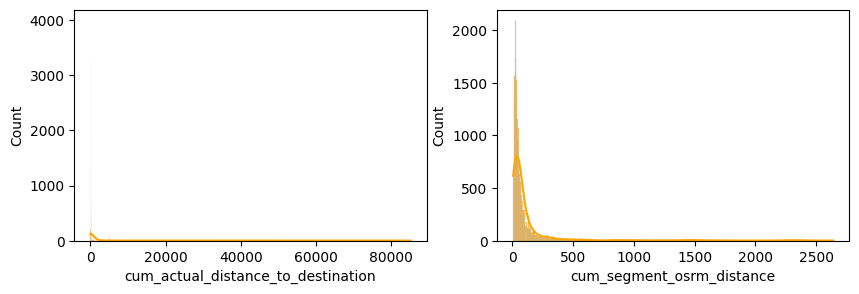

In [ ]:
plt.figure(figsize=(10,3))

plt.subplot(121)
sns.histplot(df['cum_actual_distance_to_destination'], kde=True, color='orange')

plt.subplot(122)
sns.histplot(df['cum_segment_osrm_distance'], kde=True, color='orange')

plt.show()

In [ ]:
# Perform the two-sample t-test

#H0: No difference between cumulative actual_distance_to_destination and cumulative segment_osrm_distance

ttest_ind(df['cum_actual_distance_to_destination'], df['cum_segment_osrm_distance'])

TtestResult(statistic=28.909668659414944, pvalue=2.409965118035917e-182, df=52734.0)

The p-value is less than the significance level of 0.05, which means we reject the null hypothesis. We can conclude that there is significant difference in the mean of cumulative actual_distance_to_destination and cumulative segment_osrm_distance.

In [ ]:
#H0: cumulative mean(actual_distance_to_destination) > cumulative mean(segment_osrm_distance)
ttest_ind(df['cum_actual_distance_to_destination'], df['cum_segment_osrm_distance'], alternative="greater")

TtestResult(statistic=28.909668659414944, pvalue=1.2049825590179586e-182, df=52734.0)

* The p-value is less than the significance level of 0.05, which means we reject the null hypothesis.
* Mean(actual_distance_to_destination) < Mean(segment_osrm_distance)
* Cumulative actual distance between two points is less than cumulative segmented distance.

**segment_osrm_distance and osrm_distance**

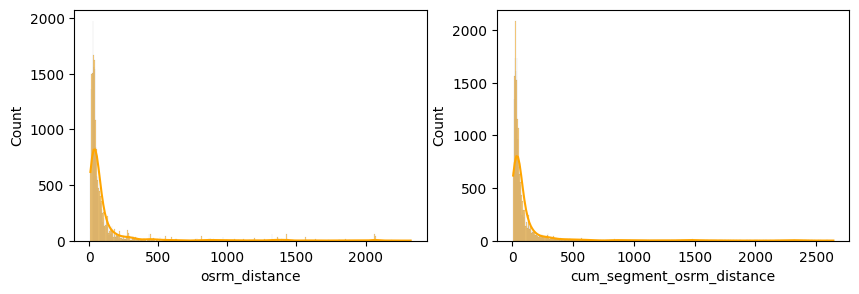

In [ ]:
plt.figure(figsize=(10,3))

plt.subplot(121)
sns.histplot(df['osrm_distance'], kde=True, color='orange')

plt.subplot(122)
sns.histplot(df['cum_segment_osrm_distance'], kde=True, color='orange')

plt.show()

In [ ]:
# Perform the two-sample t-test

#H0: No difference between osrm_distance and cumulated segment_osrm_distance

ttest_ind(df['osrm_distance'], df['cum_segment_osrm_distance'])

TtestResult(statistic=-4.500595853737752, pvalue=6.790794407244852e-06, df=52734.0)

The p-value is less than the significance level of 0.05, which means we reject the null hypothesis. We can conclude that there is significant difference in the mean osrm_distance and cumulative segment_osrm_distance.

In [ ]:
#H0: mean(osrm_distance) > mean(cumulated segment_osrm_distance)
ttest_ind(df['osrm_distance'], df['cum_segment_osrm_distance'], alternative="greater")

TtestResult(statistic=-4.500595853737752, pvalue=0.9999966046027964, df=52734.0)

* The p-value is greater than the significance level of 0.05, which means we fail reject the null hypothesis.
* Mean(osrm_distance) > cumulative Mean(segment_osrm_distance)
* Estimated distance between two points is greater then estimated cumulated segment distaces

**osrm_time and segment_osrm_time**

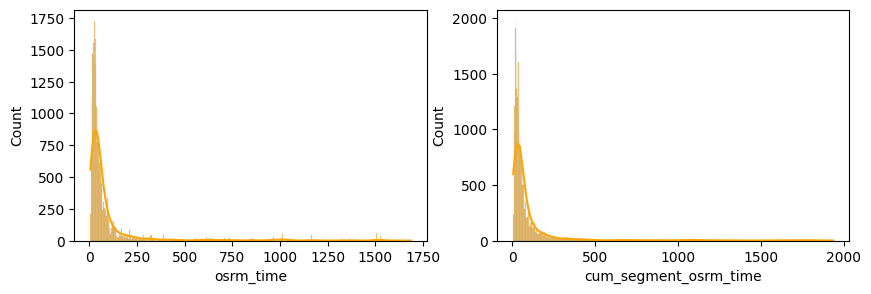

In [ ]:
plt.figure(figsize=(10,3))

plt.subplot(121)
sns.histplot(df['osrm_time'], kde=True, color='orange')

plt.subplot(122)
sns.histplot(df['cum_segment_osrm_time'], kde=True, color='orange')

plt.show()

In [ ]:
# Perform the two-sample t-test

#H0: No difference between osrm_distance and cumulated segment_osrm_distance

ttest_ind(df['osrm_time'], df['cum_segment_osrm_time'])

TtestResult(statistic=-6.282322100204656, pvalue=3.361483126964898e-10, df=52734.0)

The p-value is less than the significance level of 0.05, which means we reject the null hypothesis. We can conclude that there is significant difference in the mean osrm_time and cumulative segment_osrm_time.

In [ ]:
#H0: mean(osrm_time) > mean(cumulated segment_osrm_time)
ttest_ind(df['osrm_time'], df['cum_segment_osrm_time'], alternative="greater")

TtestResult(statistic=-6.282322100204656, pvalue=0.9999999998319258, df=52734.0)

* The p-value is greater than the significance level of 0.05, which means we fail reject the null hypothesis.
* Mean(osrm_time) > cumulative Mean(segment_osrm_time)
* Estimated time between two points is greater then estimated cumulated segment times.

**Statistical significance between numerical features**

In [ ]:
#H0: All numerical columns are normal
shapiro(df[num_cols].sample(500))

ShapiroResult(statistic=0.05986164930391602, pvalue=4.0743357018474196e-85)

The p-value is less than the significance level of 0.05, which means we reject the null hypothesis. Not all features are normal. So ANOVA cannot be applied

In [ ]:
#H0: No significant difference between the medians of the numerical features
kruskal(*df[num_cols])

KruskalResult(statistic=6.0, pvalue=0.42319008112684364)

The p-value is greater than the significance level of 0.05, which means we fail to reject the null hypothesis. Hence there is no significance difference between medians of numerical features.

**actual_time, segment_actual_time, osrm_time and segment_osrm_time**

In [ ]:
#H0: Columns are normally distributed
shapiro(df[['actual_time', 'cum_segment_actual_time', 'osrm_time', 'cum_segment_osrm_time']].sample(500))

ShapiroResult(statistic=0.4110809789950406, pvalue=1.3060544458191473e-62)

The p-value is less than the significance level of 0.05, which means we reject the null hypothesis. Not all the numerical colmns are normal. So ANOVA cannot be applied

In [ ]:
#H0: No significant difference between the medians of the features
kruskal(*df[['actual_time', 'cum_segment_actual_time', 'osrm_time', 'cum_segment_osrm_time']])

KruskalResult(statistic=3.0, pvalue=0.3916251762710877)

The p-value is greater than the significance level of 0.05, which means we fail to reject the null hypothesis. Hence there is no significance difference between medians of the features.

**start_scan_to_end_scan, actual_distance_to_destination, osrm_distance and segment_osrm_distance**

In [ ]:
#H0: Columns are normally distributed
shapiro(df[['start_scan_to_end_scan', 'cum_actual_distance_to_destination', 'osrm_distance', 'cum_segment_osrm_distance']].sample(500))

ShapiroResult(statistic=0.09503385175637691, pvalue=8.371832947825234e-71)

The p-value is less than the significance level of 0.05, which means we reject the null hypothesis. Not features are normal. So ANOVA cannot be applied

In [ ]:
#H0: No significant difference between the medians of the features
kruskal(*df[['start_scan_to_end_scan', 'cum_actual_distance_to_destination', 'osrm_distance', 'cum_segment_osrm_distance']])

KruskalResult(statistic=3.0, pvalue=0.3916251762710877)

The p-value is greater than the significance level of 0.05, which means we fail to reject the null hypothesis. Hence there is no significance different between medians of the features.

**trip_month and route_type**

In [ ]:
cont_table = pd.crosstab(df['trip_month'], df['route_type'])
print(cont_table)

#H0: No significance relation between trip_month and route_type
# chi-square test
chi2_stat, p_val, dof, ex = chi2_contingency(cont_table)

# print results
print("Chi-Square Test Results:")
print("Chi-Square Statistic:", chi2_stat)
print("p-value:", p_val)
print("Degrees of Freedom:", dof)
print("Expected Values:\n", ex)

route_type  Carting    FTL
trip_month                
September     10788  12371
October        1641   1568
Chi-Square Test Results:
Chi-Square Statistic: 23.286599409014713
p-value: 1.395690494894908e-06
Degrees of Freedom: 1
Expected Values:
 [[10916.38391232 12242.61608768]
 [ 1512.61608768  1696.38391232]]


The p-value is less than our significance level of 0.05. Therefore, we reject the null hypothesis and conclude that there is a significant association between trip month and route_type.

# Outlier Handling

In [ ]:
df[num_cols].describe()

,start_scan_to_end_scan,actual_time,osrm_time,osrm_distance,cum_actual_distance_to_destination,cum_segment_actual_time,cum_segment_osrm_time
count,26368.000000,26368.000000,26368.000000,26368.000000,26368.000000,26368.000000,26368.000000
mean,298.262060,200.690193,90.686704,114.827642,1286.009827,198.863092,101.681318
std,440.556923,384.853640,185.080423,253.773765,6512.604309,381.283224,215.650948
min,20.000000,9.000000,6.000000,9.072900,9.001351,9.000000,6.000000
25%,91.000000,51.000000,25.000000,27.764725,47.447490,50.000000,25.000000
50%,152.000000,84.000000,39.000000,43.633050,83.445372,83.000000,42.000000
75%,307.000000,168.000000,72.000000,85.566975,205.002010,166.000000,79.000000
max,7898.000000,4532.000000,1686.000000,2326.199100,85110.885092,4504.000000,1938.000000


All the numerical features seem to have outliers.



<Axes: >

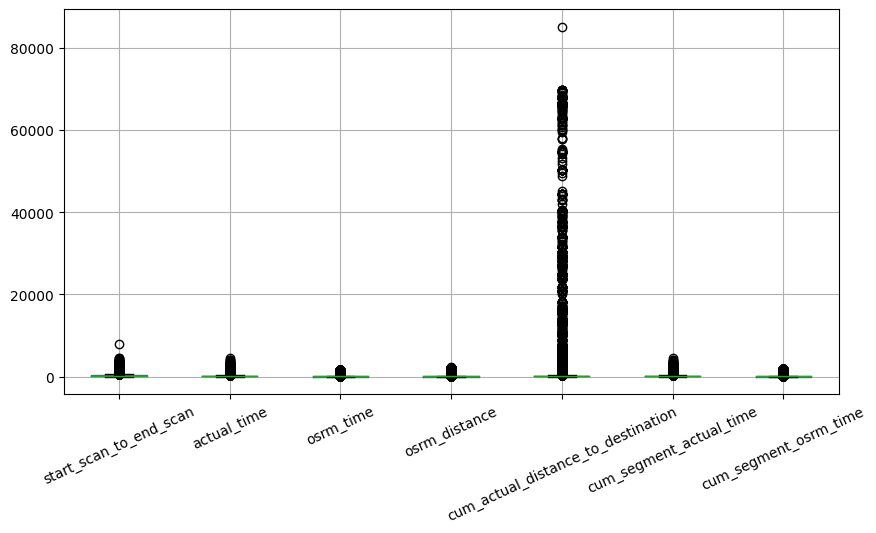

In [ ]:
df[num_cols].boxplot(rot=25, figsize=(10,5))


All the values in these columns are highly variable and can vary on higher ranges.



In [ ]:
Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)

IQR = Q3 - Q1
IQR

,0
start_scan_to_end_scan,216.00000
actual_time,117.00000
osrm_time,47.00000
osrm_distance,57.80225
cum_actual_distance_to_destination,157.55452
cum_segment_actual_time,116.00000
cum_segment_osrm_time,54.00000


In [ ]:
df = df = df[~((df[num_cols] < (Q1 - 1.5 * IQR)) | (df[num_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]
df = df.reset_index(drop=True)
df.shape

(21216, 30)

<Axes: >

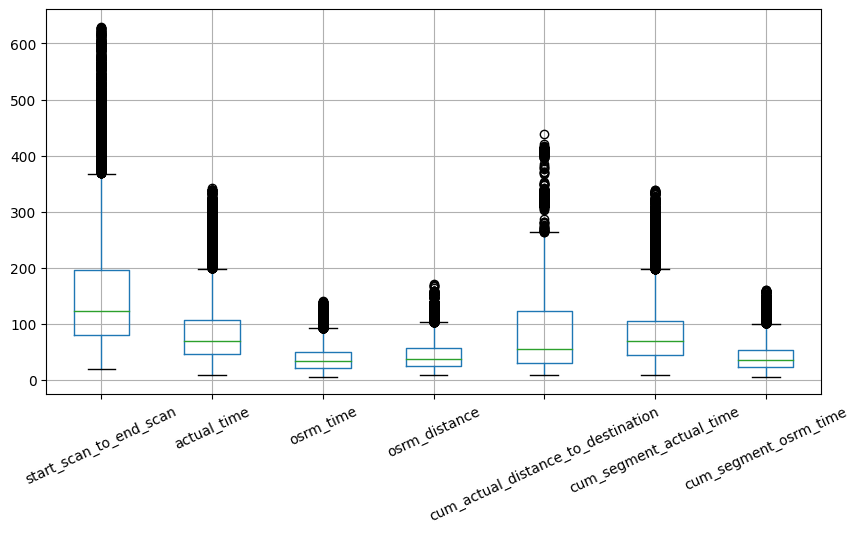

In [ ]:
df[num_cols].boxplot(rot=25, figsize=(10,5))


# Converting Categorical to Numerical

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['data'] = label_encoder.fit_transform(df['data'])
df['data'].value_counts()

,count
data,
1,15094
0,6122


In [ ]:
label_encoder = LabelEncoder()
df['route_type'] = label_encoder.fit_transform(df['route_type'])
df['route_type'].value_counts()

,count
route_type,
0,11662
1,9554


In [ ]:
month_cat_num = df.copy()

# perform one-hot encoding
one_hot = pd.get_dummies(month_cat_num['trip_month'], prefix='month')

# concatenate one-hot encoded columns to original dataframe
month_cat_num = pd.concat([month_cat_num, one_hot], axis=1)

# drop original trip_month column
month_cat_num.drop('trip_month', axis=1, inplace=True)

month_cat_num[one_hot.columns].head()

,month_January,month_February,month_March,month_April,month_May,month_June,month_July,month_August,month_September,month_October,month_November,month_December
0,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,True,False,False,False
2,False,False,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False,False,True,False,False,False


# Normalization and standardization

In [ ]:
from sklearn.preprocessing import StandardScaler

std_df = df.copy()
scaler = StandardScaler()
scaler.fit(std_df[num_cols])

StandardScaler()

In [ ]:
std_df[num_cols] = scaler.transform(std_df[num_cols])
std_df.head()

,data,trip_creation_time,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,start_scan_to_end_scan,actual_time,...,source_state,destination_1,destination_2,destination_3,destination_state,trip_source,trip_destination,trip_year,trip_month,trip_day
0,1,2018-09-20 02:35:00,0,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),-0.663550,-0.309256,...,Gujarat,Khambhat,MotvdDPP,D,Gujarat,IND388121AAA,IND388320AAA,2018,September,20
1,1,2018-09-20 02:35:00,0,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),-0.441473,0.318216,...,Gujarat,Anand,Vaghasi,IP,Gujarat,IND388121AAA,IND388320AAA,2018,September,20
2,1,2018-09-23 06:42:00,1,trip-153768492602129387,IND421302AAG,Bhiwandi_Mankoli_HB (Maharashtra),IND411033AAA,Pune_Tathawde_H (Maharashtra),1.422040,1.813075,...,Maharashtra,Pune,Tathawde,H,Maharashtra,IND421302AAG,IND411033AAA,2018,September,23
3,1,2018-09-14 15:42:00,0,trip-153693976643699843,IND400011AAA,LowerParel_CP (Maharashtra),IND400072AAD,Mumbai_Chndivli_PC (Maharashtra),-0.451129,-0.456896,...,None,Mumbai,Chndivli,PC,Maharashtra,IND400011AAA,IND400072AAD,2018,September,14
4,1,2018-09-13 20:44:00,1,trip-153687145942424248,IND562132AAA,Bangalore_Nelmngla_H (Karnataka),IND560099AAB,Bengaluru_Bomsndra_HB (Karnataka),0.388900,-0.327711,...,Karnataka,Bengaluru,Bomsndra,HB,Karnataka,IND562132AAA,IND683511AAA,2018,September,13


In [ ]:
from sklearn.preprocessing import MinMaxScaler

norm_df = df.copy()
scaler = MinMaxScaler()
scaler.fit(norm_df[num_cols])
scaled_features = scaler.transform(norm_df[num_cols])

norm_df[num_cols] = pd.DataFrame(data=scaled_features, columns=num_cols)
norm_df.head()

,data,trip_creation_time,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,start_scan_to_end_scan,actual_time,...,source_state,destination_1,destination_2,destination_3,destination_state,trip_source,trip_destination,trip_year,trip_month,trip_day
0,1,2018-09-20 02:35:00,0,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),0.108197,0.177177,...,Gujarat,Khambhat,MotvdDPP,D,Gujarat,IND388121AAA,IND388320AAA,2018,September,20
1,1,2018-09-20 02:35:00,0,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),0.145902,0.279279,...,Gujarat,Anand,Vaghasi,IP,Gujarat,IND388121AAA,IND388320AAA,2018,September,20
2,1,2018-09-23 06:42:00,1,trip-153768492602129387,IND421302AAG,Bhiwandi_Mankoli_HB (Maharashtra),IND411033AAA,Pune_Tathawde_H (Maharashtra),0.462295,0.522523,...,Maharashtra,Pune,Tathawde,H,Maharashtra,IND421302AAG,IND411033AAA,2018,September,23
3,1,2018-09-14 15:42:00,0,trip-153693976643699843,IND400011AAA,LowerParel_CP (Maharashtra),IND400072AAD,Mumbai_Chndivli_PC (Maharashtra),0.144262,0.153153,...,None,Mumbai,Chndivli,PC,Maharashtra,IND400011AAA,IND400072AAD,2018,September,14
4,1,2018-09-13 20:44:00,1,trip-153687145942424248,IND562132AAA,Bangalore_Nelmngla_H (Karnataka),IND560099AAB,Bengaluru_Bomsndra_HB (Karnataka),0.286885,0.174174,...,Karnataka,Bengaluru,Bomsndra,HB,Karnataka,IND562132AAA,IND683511AAA,2018,September,13


# INSIGHTS

* The dataset has 24 columns with 144867 records.

* Missing values are found in source_name and destination_name.

* There are lot of duplicate records, which can be handled my cumulative aggregation on few columns and taking the last record of few columns.

* After deleting duplicate records, insignificant columns and creating
necessary features, we have 30 columns with 21216 records.

* Segment between Bangalore_Nelmngla_H, Karnataka and Bengaluru_KGAirprt_HB,Karnataka is the most used segment.

* Gurgaon_Bilaspur_HB, Haryana is the centre with highest traffic.

* There is one record for every trip.In Carting, Pappadahandi_Central_DPP_2, Orissa to Visakhapatnam_Gajuwaka_IP, Andhra Pradesh is the longest trip. In FTL, trip from Guwahati_Hub, Assam to Bhiwandi_Mankoli_HB, Maharashtra is the longest trip.

* All numerical columns had outliers as the features are highly variant.





**HYPOTHESIS TESTING INSIGHTS**

* mean(actual_time) is less than mean(osrm_time)

* mean(actual_time) is equal to mean(segment_actual_time)

* mean(actual_distance_to_destination) is less than mean(segment_osrm_distance)

* mean(osrm_distance) is greater than mean(segment_osrm_distance)

* mean(osrm_time) is greater than mean(segment_osrm_time) . We can say that the OSRM distances and times are greater than segment OSRM and actual distances and times.

* No significance difference is found between below features, actual_time, segment_actual_time, osrm_time and segment_osrm_time start_scan_to_end_scan, actual_distance_to_destination, osrm_distance and segment_osrm_distance

# RECOMMENDATIONS

* As the actual distances and times are greater than the OSRM distances and times, the trip can be completed before estimated time and in lesser budget.

* Revisit information fed to routing engine for trip planning. Check for discrepancies with transporters, if the routing engine is configured for optimum results.

* Huge number of trips are done is Karnataka followed by Maharastra. There is need to plan resources for these two states.

* Trip from and to Bengaluru and Mumbai are highest. So allocating enough transporters to these cities is needed.

* Trips with longer durations should be optimized by choosing different mode of transport.